In [495]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

# Step 1 : Data Import

In [32]:
raw_data = pd.read_csv('train.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Observations
1. Total size of data : 1460 rows
2. Total Columns : 81 (Containing 80 features and target variable is SalePrice)

# Step 2: Data Cleaning

In [34]:
# Let's find out the columns which have missing values
missing_value_cols = raw_data.isnull().sum(axis=0)
missing_value_cols = missing_value_cols[missing_value_cols > 0]
print(f'Missing value percentage column wise\n{round(missing_value_cols/len(raw_data),3)*100}')

Missing value percentage column wise
LotFrontage     17.7
Alley           93.8
MasVnrType       0.5
MasVnrArea       0.5
BsmtQual         2.5
BsmtCond         2.5
BsmtExposure     2.6
BsmtFinType1     2.5
BsmtFinType2     2.6
Electrical       0.1
FireplaceQu     47.3
GarageType       5.5
GarageYrBlt      5.5
GarageFinish     5.5
GarageQual       5.5
GarageCond       5.5
PoolQC          99.5
Fence           80.8
MiscFeature     96.3
dtype: float64


#### Dropping following features from the dataset because missing value percentage is very high
Alley , FireplaceQu  , PoolQC , Fence , MiscFeature , LotFrontage

In [35]:
# Also dropping Id columns as this is just a unique identifier not usefule for the model building
data = raw_data.drop(['Alley' , 'FireplaceQu' , 'PoolQC' , 'Fence' , 'MiscFeature','Id','LotFrontage'],axis=1)

In [36]:
# Removing duplicates
data = data.drop_duplicates()

In [37]:
data.shape

(1460, 74)

In [48]:
# Let's find out the columns which still have missing values
missing_value_cols = data.isnull().sum(axis=0)
missing_value_cols = missing_value_cols[missing_value_cols > 0]
print(f'Missing value percentage column wise\n{round(missing_value_cols/len(data),3)*100}')

Missing value percentage column wise
MasVnrType      0.5
MasVnrArea      0.5
BsmtQual        2.5
BsmtCond        2.5
BsmtExposure    2.6
BsmtFinType1    2.5
BsmtFinType2    2.6
Electrical      0.1
GarageType      5.5
GarageYrBlt     5.5
GarageFinish    5.5
GarageQual      5.5
GarageCond      5.5
dtype: float64


In [88]:
# We may try the imputation techniques to fill blank values for these columns
none_count_MasVnrType  = round(data[(data.MasVnrType == 'None')].shape[0]*100/len(data),2)
zero_count_MasVnrArea  = round(data[(data.MasVnrArea == 0)].shape[0]*100/len(data),2)
print(f'{none_count_MasVnrType}% of records has None value for Masonry veneer type (MasVnrType)')
print(f'{zero_count_MasVnrArea}% of records has zero value for Masonry veneer area (MasVnrArea)')

59.18% of records has None value for Masonry veneer type (MasVnrType)
58.97% of records has zero value for Masonry veneer area (MasVnrArea)


In [101]:
# Dropping MasVnrType and MasVnrArea columns from the dataset
data = data.drop(['MasVnrType','MasVnrArea'],axis = 1)
missing_value_cols = data.isnull().sum(axis=0)
missing_value_cols = missing_value_cols[missing_value_cols > 0]
print(f'Missing value percentage column wise\n{round(missing_value_cols/len(data),3)*100}')

Missing value percentage column wise
BsmtQual        2.5
BsmtCond        2.5
BsmtExposure    2.6
BsmtFinType1    2.5
BsmtFinType2    2.6
Electrical      0.1
GarageType      5.5
GarageYrBlt     5.5
GarageFinish    5.5
GarageQual      5.5
GarageCond      5.5
dtype: float64


In [115]:
# There are 37 records for which Basement height and basement condition is not given.
data[data.BsmtQual.isnull()][['BsmtQual','BsmtCond']].shape[0]

37

In [116]:
data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [119]:
# The median value for SalePrice is 101800 for records where Basement height is not given
data[data.BsmtQual.isnull()]['SalePrice'].describe()

count        37.000000
mean     105652.891892
std       29278.694797
min       39300.000000
25%       90000.000000
50%      101800.000000
75%      118858.000000
max      198500.000000
Name: SalePrice, dtype: float64

In [126]:
# finding out the mode of Bsmt height and basement condition for the price range between 100000 and 110000 (around median)
# to impute the missing values
data[(data.SalePrice > 100000) & (data.SalePrice < 110000)]['BsmtQual'].value_counts()

TA    41
Gd     2
Fa     2
Name: BsmtQual, dtype: int64

In [127]:
data[(data.SalePrice > 100000) & (data.SalePrice < 110000)]['BsmtCond'].value_counts()

TA    42
Fa     3
Name: BsmtCond, dtype: int64

In [138]:
# We will impute TA for missing values in BsmtQual and BsmtCond features
data.BsmtQual = data.BsmtQual.fillna('TA')
data.BsmtCond = data.BsmtCond.fillna('TA')

In [181]:
# Imputing other categorical features with mode values
data.BsmtExposure = data.BsmtExposure.fillna('No')
data.BsmtFinType1 = data.BsmtFinType1.fillna('Unf')
data.BsmtFinType2 = data.BsmtFinType2.fillna('Unf')
data.Electrical = data.Electrical.fillna('SBrkr')
data.GarageFinish = data.GarageFinish.fillna('Unf')
data.GarageQual = data.GarageQual.fillna('TA')
data.GarageCond = data.GarageCond.fillna('TA')

# Imputing with the mode value derived within the sale price range
data.GarageType = data.GarageType.fillna('Detchd')
# Imputing Garage built with the Year when house was built
data.GarageYrBlt = data.GarageYrBlt.fillna(data.YearBuilt)
data.GarageYrBlt = data.GarageYrBlt.astype(int)

In [182]:
missing_value_cols = data.isnull().sum(axis=0)
missing_value_cols = missing_value_cols[missing_value_cols > 0]
print(f'Missing value percentage column wise\n{round(missing_value_cols/len(data),3)*100}')

Missing value percentage column wise
Series([], dtype: float64)


#### All the missing columns have been imputed

In [238]:
# Checking zero values percentage on the numeric columns
newdf = data.select_dtypes('int64')
df = pd.DataFrame(columns=['column','zeroCount','percentage'])
count=0
for colName in newdf.columns:
    a = newdf[newdf[colName] == 0].shape[0]
    if(a > 0):
        df.loc[count] = [colName,a,round(a*100/len(data),2)]
        count += 1
df.sort_values(by='percentage',ascending=False)


,column,zeroCount,percentage
20,PoolArea,1453,99.52
18,3SsnPorch,1436,98.36
5,LowQualFinSF,1434,98.22
21,MiscVal,1408,96.44
7,BsmtHalfBath,1378,94.38
19,ScreenPorch,1344,92.05
1,BsmtFinSF2,1293,88.56
17,EnclosedPorch,1252,85.75
9,HalfBath,913,62.53
6,BsmtFullBath,856,58.63


In [243]:
# Dropping columns which have zero value above than 30% as these columns will not help with the prediction
data = data.drop(list(df[df.percentage > 30]['column']),axis=1)
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

# Step 3: EDA

### Univariate analysis

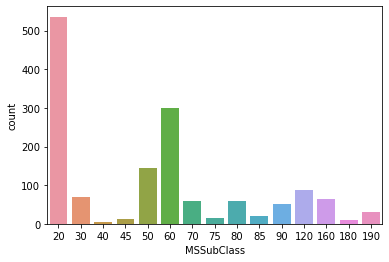

In [251]:
sns.countplot(data.MSSubClass)
plt.show()

Most of the points belong to "1-STORY 1946 & NEWER ALL STYLES" for the type of dwelling involved in sale

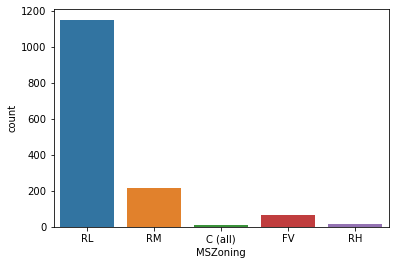

In [252]:
sns.countplot(data.MSZoning)
plt.show()

Most of the points belong to "Residential Low Density" for the zoning classification

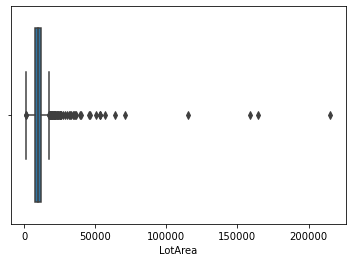

In [259]:
sns.boxplot(data.LotArea)
plt.show()

Seeing many outliers for the Lot Area from the above box plot.

In [257]:
data.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [264]:
np.quantile(data.LotArea,q = [.9,.95,.99])

array([14381.7 , 17401.15, 37567.64])

In [267]:
# find out the records which has lot area greater than 30k which is approx last 3 percentile of records
data[data.LotArea > 30000].shape[0]

22

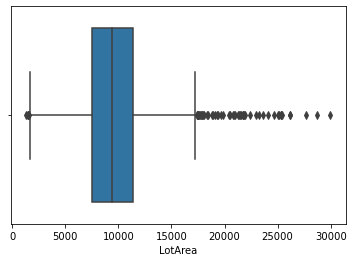

In [269]:
# Removing these 22 records from the dataset and then plotting the box plot
data = data[data.LotArea < 30000]
sns.boxplot(data.LotArea)
plt.show()

This looks better but still there are many outliers in the data set

In [271]:
# find out the records which has lot area greater than 20k 
data[data.LotArea > 20000].shape[0]

31

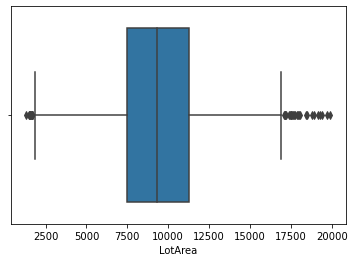

In [272]:
# Removing these 31 records from the dataset and then plotting the box plot
data = data[data.LotArea < 20000]
sns.boxplot(data.LotArea)
plt.show()

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

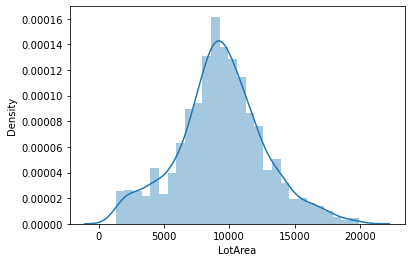

In [273]:
sns.distplot(data.LotArea)

This is showing perfect Gaussian Distribution

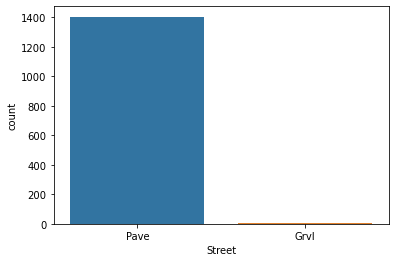

In [275]:
sns.countplot(data.Street)
plt.show()

In [276]:
data.Street.value_counts()

Pave    1403
Grvl       4
Name: Street, dtype: int64

In [277]:
# Dropping Street feature as it has almost all the values belonging to single category
data = data.drop('Street',axis=1)

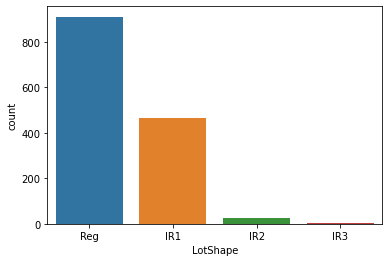

In [280]:
sns.countplot(data.LotShape)
plt.show()

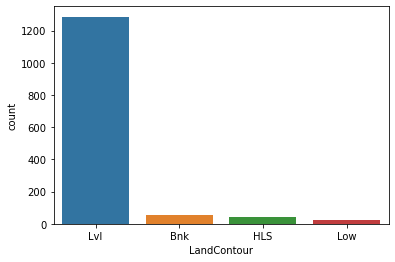

In [281]:
sns.countplot(data.LandContour)
plt.show()

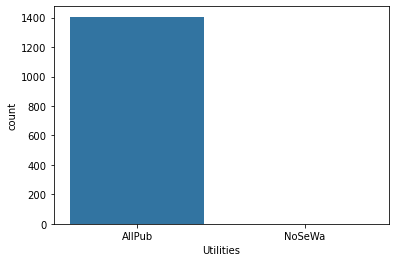

In [283]:
sns.countplot(data.Utilities)
plt.show()

In [284]:
data.Utilities.value_counts()

AllPub    1406
NoSeWa       1
Name: Utilities, dtype: int64

In [285]:
# Dropping Utilities feature as it has almost all the values belonging to single category
data = data.drop('Utilities',axis=1)

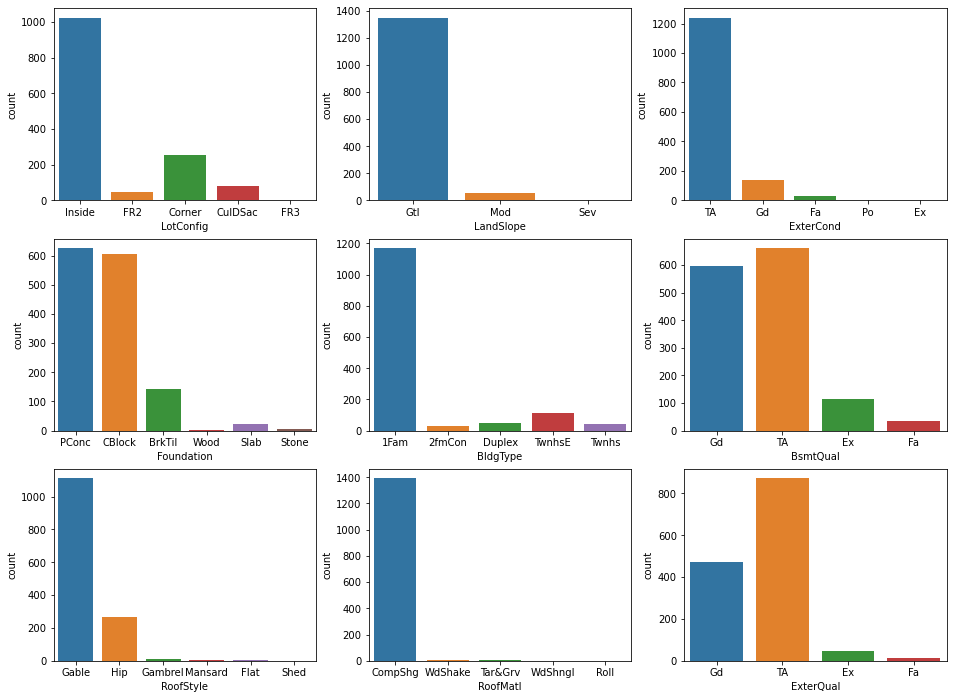

In [297]:
plt.figure(figsize = (16,12))
plt.subplot(331)
sns.countplot(data.LotConfig)
plt.subplot(332)
sns.countplot(data.LandSlope)
plt.subplot(333)
sns.countplot(data.ExterCond)
plt.subplot(334)
sns.countplot(data.Foundation)
plt.subplot(335)
sns.countplot(data.BldgType)
plt.subplot(336)
sns.countplot(data.BsmtQual)
plt.subplot(337)
sns.countplot(data.RoofStyle)
plt.subplot(338)
sns.countplot(data.RoofMatl)
plt.subplot(339)
sns.countplot(data.ExterQual)


plt.show()

In [299]:
data.RoofMatl.value_counts()

CompShg    1393
Tar&Grv       7
WdShake       4
WdShngl       2
Roll          1
Name: RoofMatl, dtype: int64

In [300]:
# Dropping RoofMatl feature as it has almost all the values belonging to single category
data = data.drop('RoofMatl',axis=1)

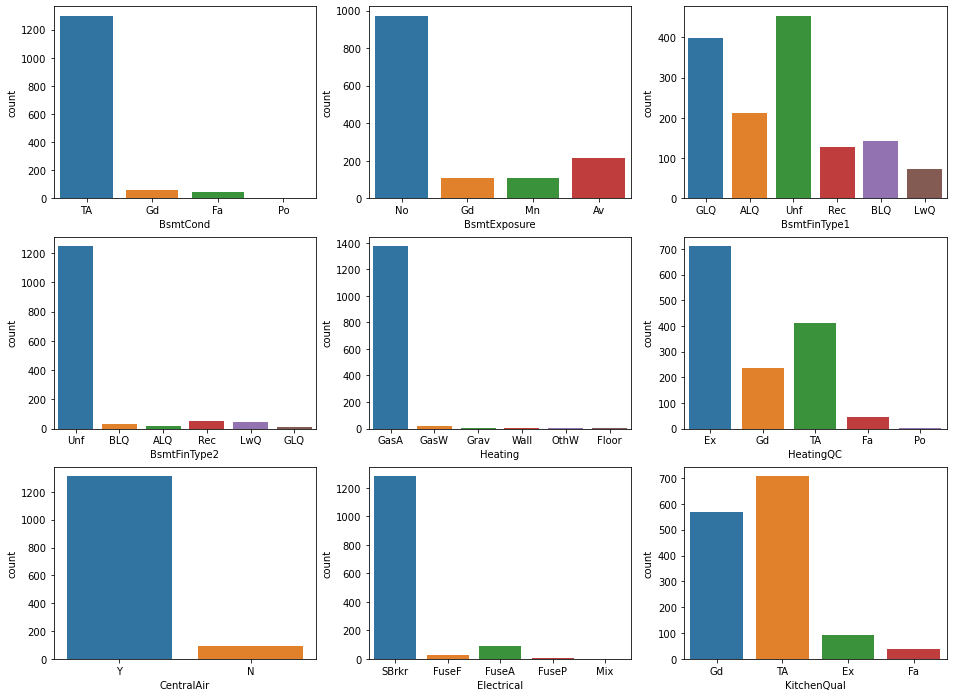

In [302]:
plt.figure(figsize = (16,12))
plt.subplot(331)
sns.countplot(data.BsmtCond)
plt.subplot(332)
sns.countplot(data.BsmtExposure)
plt.subplot(333)
sns.countplot(data.BsmtFinType1)
plt.subplot(334)
sns.countplot(data.BsmtFinType2)
plt.subplot(335)
sns.countplot(data.Heating)
plt.subplot(336)
sns.countplot(data.HeatingQC)
plt.subplot(337)
sns.countplot(data.CentralAir)
plt.subplot(338)
sns.countplot(data.Electrical)
plt.subplot(339)
sns.countplot(data.KitchenQual)


plt.show()

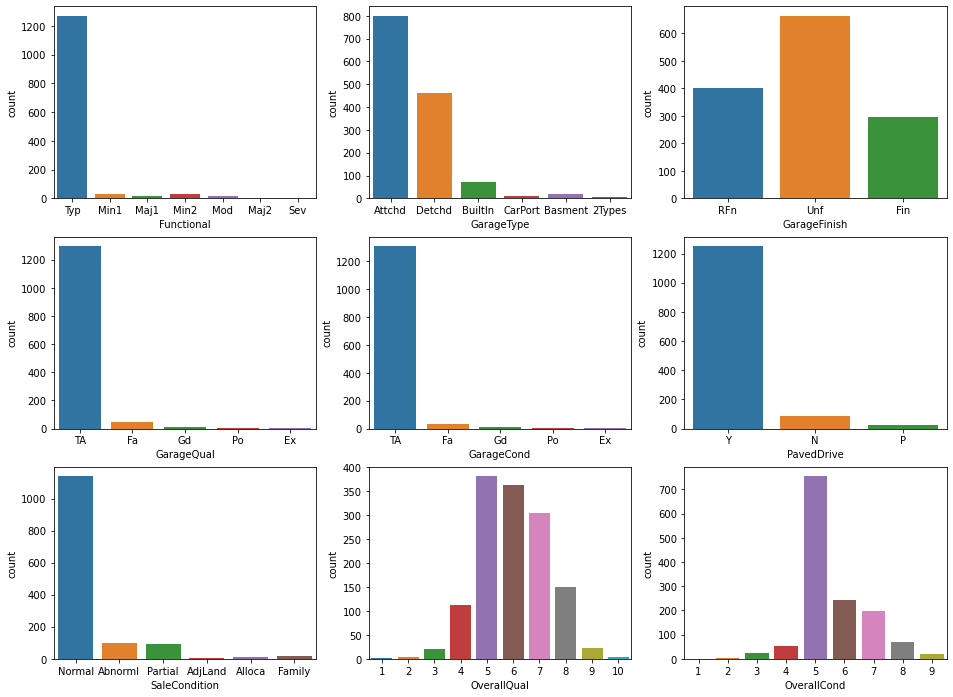

In [330]:
plt.figure(figsize = (16,12))
plt.subplot(331)
sns.countplot(data.Functional)
plt.subplot(332)
sns.countplot(data.GarageType)
plt.subplot(333)
sns.countplot(data.GarageFinish)
plt.subplot(334)
sns.countplot(data.GarageQual)
plt.subplot(335)
sns.countplot(data.GarageCond)
plt.subplot(336)
sns.countplot(data.PavedDrive)
plt.subplot(337)
sns.countplot(data.SaleCondition)
plt.subplot(338)
sns.countplot(data.OverallQual)
plt.subplot(339)
sns.countplot(data.OverallCond)


plt.show()

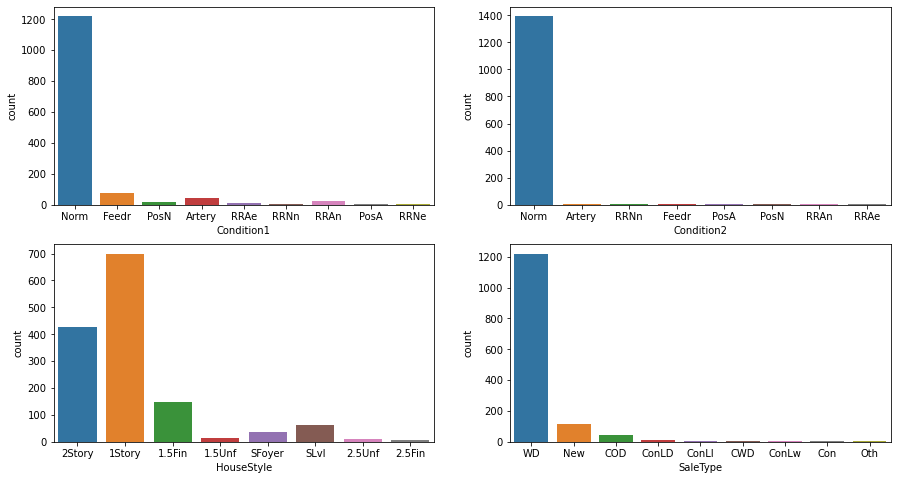

In [310]:
plt.figure(figsize = (15,8))
plt.subplot(221)
sns.countplot(data.Condition1)
plt.subplot(222)
sns.countplot(data.Condition2)
plt.subplot(223)
sns.countplot(data.HouseStyle)
plt.subplot(224)
sns.countplot(data.SaleType)


plt.show()

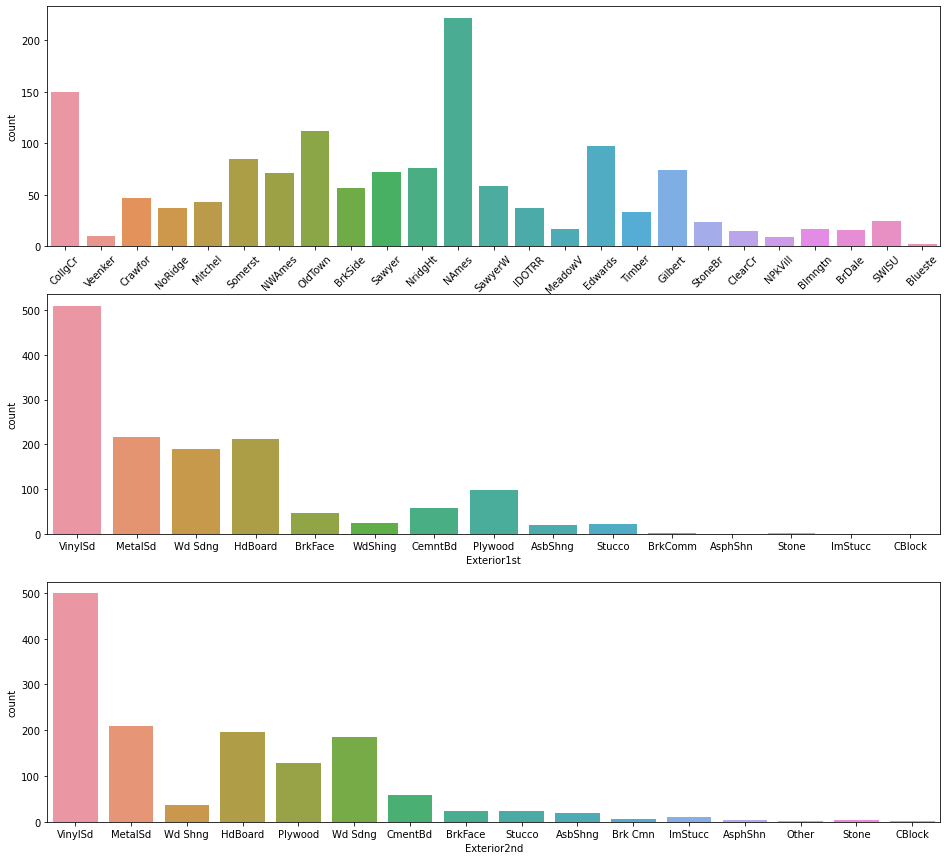

In [315]:
plt.figure(figsize = (16,15))
plt.subplot(311)
sns.countplot(data.Neighborhood)
plt.xticks(rotation=45)
plt.subplot(312)
sns.countplot(data.Exterior1st)
plt.subplot(313)
sns.countplot(data.Exterior2nd)

plt.show()

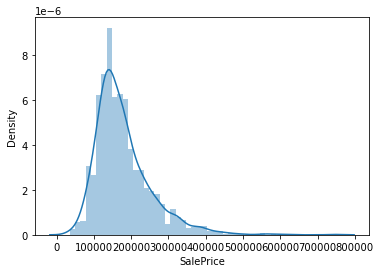

In [318]:
# Plotting histograms for all the SalesPrice - Target feature
sns.distplot(data.SalePrice)
plt.show()

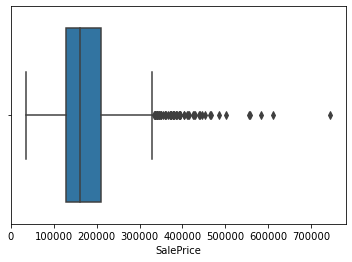

In [320]:
sns.boxplot(data.SalePrice)
plt.show()

In [321]:
data.SalePrice.describe()

count      1407.000000
mean     178171.181947
std       75694.938788
min       34900.000000
25%      129000.000000
50%      160000.000000
75%      210000.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [322]:
np.quantile(data.SalePrice,q=[.8,.85,.9,.95,.97,.99])

array([227000. , 248032.8, 275000. , 322800. , 359838. , 425932.2])

In [324]:
# of records which falls under the last 5 percentile of sale price
data[data.SalePrice > 360000].shape

(42, 54)

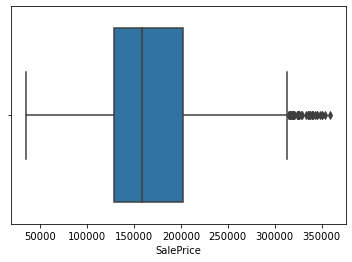

In [325]:
# Removing these 42 records from the dataset and then plotting the box plot
data = data[data.SalePrice < 360000]
sns.boxplot(data.SalePrice)
plt.show()

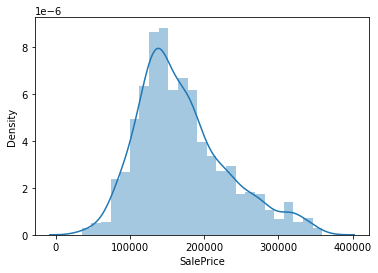

In [326]:
sns.distplot(data.SalePrice)
plt.show()

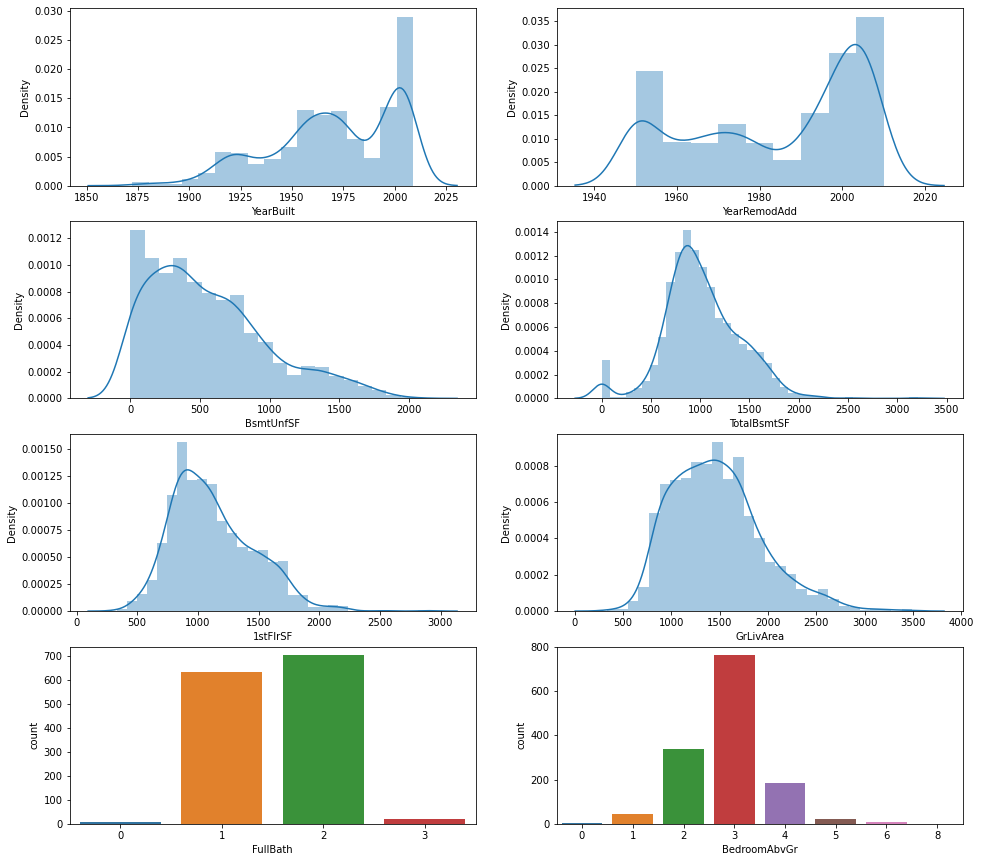

In [340]:
# plotting for all the numerical features.
plt.figure(figsize = (16,15))
plt.subplot(421)
sns.distplot(data.YearBuilt)
plt.subplot(422)
sns.distplot(data.YearRemodAdd)
plt.subplot(423)
sns.distplot(data.BsmtUnfSF)
plt.subplot(424)
sns.distplot(data.TotalBsmtSF)
plt.subplot(425)
sns.distplot(data['1stFlrSF'])
plt.subplot(426)
sns.distplot(data.GrLivArea)
plt.subplot(427)
sns.countplot(data.FullBath)
plt.subplot(428)
sns.countplot(data.BedroomAbvGr)


plt.show()

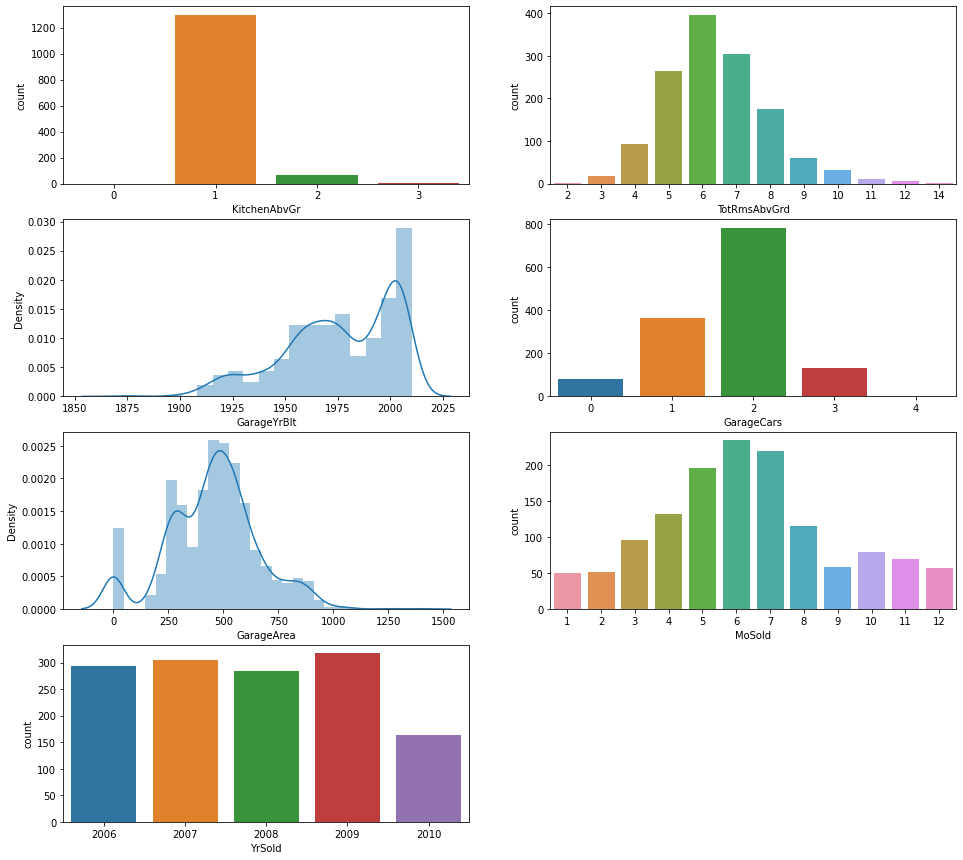

In [342]:
# plotting for all the numerical features.
plt.figure(figsize = (16,15))
plt.subplot(421)
sns.countplot(data.KitchenAbvGr)
plt.subplot(422)
sns.countplot(data.TotRmsAbvGrd)
plt.subplot(423)
sns.distplot(data.GarageYrBlt)
plt.subplot(424)
sns.countplot(data.GarageCars)
plt.subplot(425)
sns.distplot(data.GarageArea)
plt.subplot(426)
sns.countplot(data.MoSold)
plt.subplot(427)
sns.countplot(data.YrSold)


plt.show()

1. Numerical features:

    LotArea,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea
    

2. Categorical Features:

    MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,ExterCond,Foundation,
    BldgType,BsmtQual,RoofStyle,ExterQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
    ,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,
    GarageQual,GarageCond,PavedDrive,SaleCondition,OverallQual,OverallCond,Condition1,Condition2
    ,HouseStyle,SaleType,Neighborhood,Exterior1st,Exterior2nd,FullBath,BedroomAbvGr,
    KitchenAbvGr,TotRmsAbvGrd,GarageCars,MoSold,YrSold
    

3. Target Variable: SalesPrice

### Bivariate and Multivariate analysis

In [460]:
# Correlation map between numerical features and SalesPrice
numeric_vars = ['SalePrice','LotArea','YearBuilt','YearRemodAdd','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageYrBlt','GarageArea']
data[numeric_vars].corr()

,SalePrice,LotArea,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea
SalePrice,1.000000,0.388853,0.576964,0.552185,0.219989,0.587062,0.559137,0.702446,0.551708,0.629744
LotArea,0.388853,1.000000,0.053995,0.030371,0.093793,0.306210,0.406185,0.383323,0.059589,0.302360
YearBuilt,0.576964,0.053995,1.000000,0.585750,0.142154,0.382630,0.259752,0.175467,0.842750,0.477884
YearRemodAdd,0.552185,0.030371,0.585750,1.000000,0.181219,0.273634,0.205344,0.266732,0.594434,0.355811
BsmtUnfSF,0.219989,0.093793,0.142154,0.181219,1.000000,0.454998,0.332650,0.237878,0.165349,0.190764
TotalBsmtSF,0.587062,0.306210,0.382630,0.273634,0.454998,1.000000,0.776311,0.329702,0.332763,0.426588
1stFlrSF,0.559137,0.406185,0.259752,0.205344,0.332650,0.776311,1.000000,0.471253,0.238704,0.425210
GrLivArea,0.702446,0.383323,0.175467,0.266732,0.237878,0.329702,0.471253,1.000000,0.211369,0.413191
GarageYrBlt,0.551708,0.059589,0.842750,0.594434,0.165349,0.332763,0.238704,0.211369,1.000000,0.611537
GarageArea,0.629744,0.302360,0.477884,0.355811,0.190764,0.426588,0.425210,0.413191,0.611537,1.000000


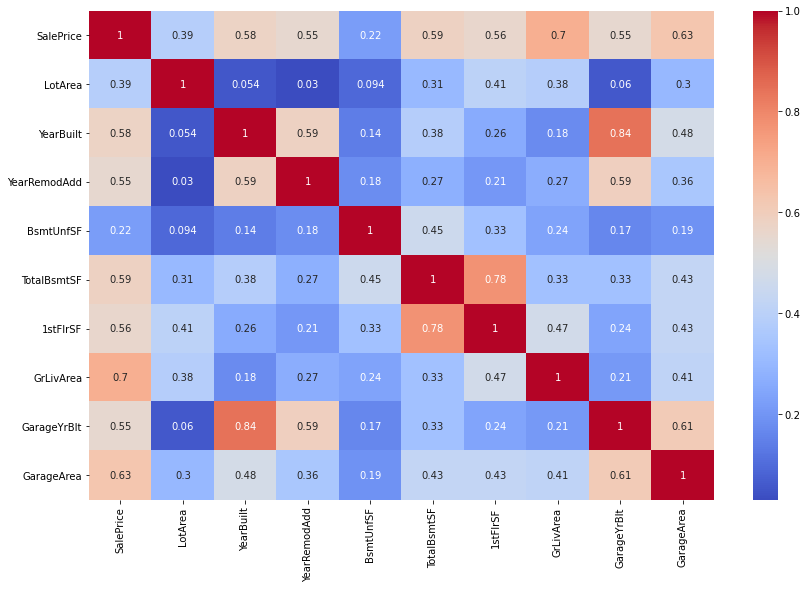

In [355]:
plt.figure(figsize=(14,9))
sns.heatmap(data[numeric_vars].corr(),annot=True,cmap='coolwarm')
plt.show()

SalePrice has good correlation with following features

YearBuilt , YearRemodAdd , TotalBsmtSF , 1stFlrSF , GrLivArea , GarageYrBlt , GarageArea

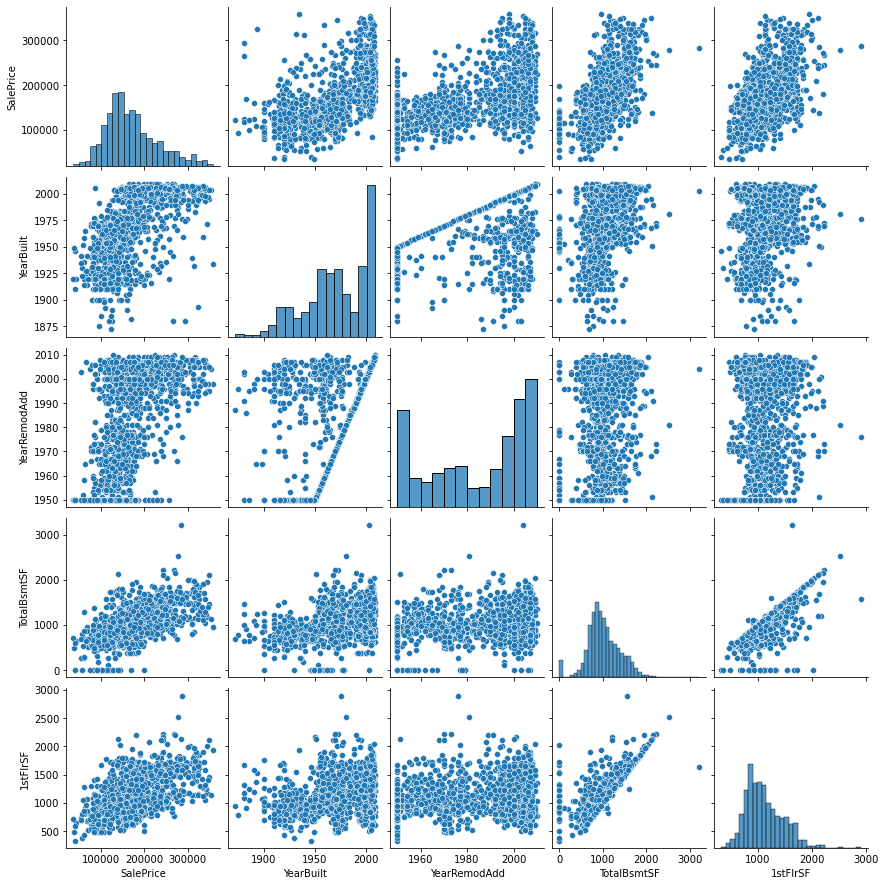

In [359]:
# Plotting pairplot between SalePrice and YearBuilt , YearRemodAdd , TotalBsmtSF , 1stFlrSF
sns.pairplot(data[['SalePrice','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF']])
plt.show()

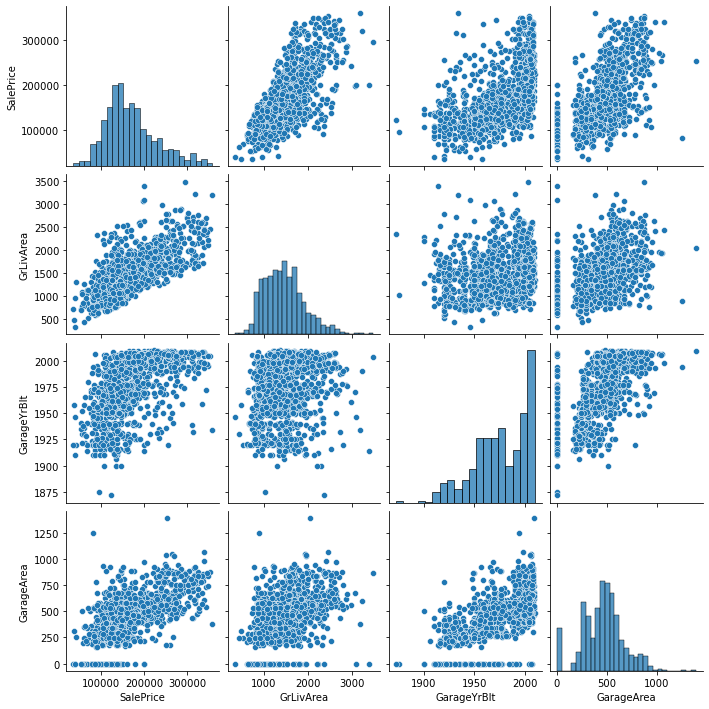

In [360]:
# Plotting pairplot between SalePrice and GrLivArea , GarageYrBlt , GarageArea
sns.pairplot(data[['SalePrice','GrLivArea' , 'GarageYrBlt' , 'GarageArea']])
plt.show()

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

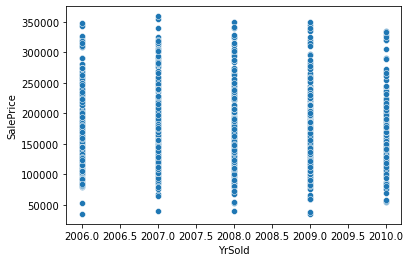

In [364]:
sns.scatterplot(data.YrSold,data.SalePrice)

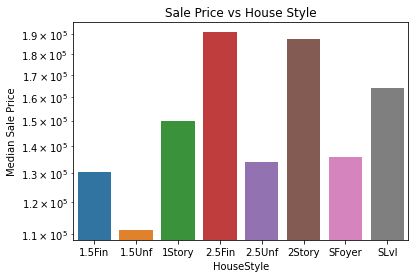

In [394]:
df = data.groupby(by='HouseStyle').median()
sns.barplot(x=df.index,y=df['SalePrice'])
plt.ylabel('Median Sale Price')
plt.title('Sale Price vs House Style')
plt.yscale('log')

# Step 4: Feature Transformation

<b> In this section we will use onehotencoding to encode categorical features 

In [422]:
# Setting some features whose data type is int but actually they are categorical variable
int_to_categ_features = ['MSSubClass','OverallQual', 'OverallCond', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'MoSold', 'YrSold']
data[int_to_categ_features] = data[int_to_categ_features].astype('category')

In [436]:
categorical_features = ['MSSubClass','MSZoning','LotShape','LandContour','LotConfig','LandSlope','ExterCond','Foundation', 'BldgType','BsmtQual','RoofStyle','ExterQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' ,'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish', 'GarageQual','GarageCond','PavedDrive','SaleCondition','OverallQual','OverallCond','Condition1','Condition2' ,'HouseStyle','SaleType','Neighborhood','Exterior1st','Exterior2nd','FullBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','GarageCars','MoSold','YrSold']
ab = pd.get_dummies(data[categorical_features])
ab.shape

(1364, 301)

In [438]:
# Dropping all the categorical features from the data set
data_1  = data.drop(categorical_features,axis=1)
data_1.shape

(1364, 10)

In [440]:
data_1 = pd.concat([data_1,ab],axis=1)
data_1.shape

(1364, 311)

In [441]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1459
Columns: 311 entries, LotArea to YrSold_2010
dtypes: int64(10), uint8(301)
memory usage: 550.4 KB


<b> Observations: </b>
1. Created dummy variables for all the categorical features
2. Dropped the categorical features from the dataset
3. Added dummy variables along with other numerical features into the data set containing all numerical features
4. There are 311 features in the final dataset and 1364 rows

# Step 5: Model building

In [446]:
# Splitting the data into predictor (X) and target (y) features
X = data_1.drop('SalePrice',axis=1)
y = data_1.SalePrice
X.shape, y.shape

((1364, 310), (1364,))

In [453]:
# Splitting the data into train(80%) and test(20%) datasets 
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=100)
X_train.shape,X_test.shape

((1091, 310), (273, 310))

In [465]:
# Applying MinMax scaling on the numerical features of the train dataset
scaler = MinMaxScaler()
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_train.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,MSSubClass_20,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
225,0.020430,0.722628,0.350000,0.308521,0.196507,0.135160,0.316237,0.862319,0.201439,0,...,0,0,0,0,0,0,0,0,1,0
1018,0.509892,0.868613,0.700000,0.188051,0.119775,0.213699,0.371774,0.862319,0.289209,0,...,0,0,0,0,0,0,1,0,0,0
645,0.496237,0.722628,0.350000,0.325171,0.305989,0.295434,0.211369,0.775362,0.414388,1,...,0,0,0,0,0,0,1,0,0,0
415,0.408548,0.985401,0.950000,0.644466,0.417966,0.459361,0.328651,0.978261,0.284892,1,...,1,0,0,0,0,0,1,0,0,0
1086,0.036237,0.737226,0.383333,0.103820,0.170306,0.096804,0.247631,0.731884,0.205755,0,...,0,0,0,0,0,0,0,0,0,1


In [466]:
# Applying similar scale to the test features using the scale which was applied on train data
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])
X_test.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,MSSubClass_20,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
304,0.918602,0.058394,0.866667,0.719882,0.458515,0.612329,1.032016,0.949275,0.625899,0,...,0,0,0,0,0,0,0,1,0,0
658,0.871129,0.554745,0.000000,0.446621,0.284467,0.263927,0.367200,0.550725,0.237410,0,...,0,0,0,0,0,0,0,0,0,1
425,0.111720,0.540146,0.700000,0.318805,0.203057,0.170320,0.344659,0.543478,0.172662,0,...,0,1,0,0,0,0,0,0,1,0
12,0.627312,0.656934,0.200000,0.085700,0.284467,0.263927,0.188827,0.652174,0.253237,1,...,0,1,0,0,0,0,0,1,0,0
631,0.176882,0.978102,0.933333,0.749265,0.484716,0.557078,0.398563,0.971014,0.451079,0,...,1,0,0,0,0,0,1,0,0,0


### Building first model using simple Linear Regression and using RFE for finding top 15 features

In [603]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
rfe = RFE(lr_model,15).fit(X_train,y_train)

In [480]:
# Top 20 features as per the Linear Regression model
sorted(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),key = lambda x : x[2])[:20]

[('MSSubClass_90', True, 1),
 ('LandContour_Bnk', True, 1),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', True, 1),
 ('BldgType_Duplex', True, 1),
 ('SaleCondition_Abnorml', True, 1),
 ('SaleCondition_AdjLand', True, 1),
 ('SaleCondition_Alloca', True, 1),
 ('SaleCondition_Family', True, 1),
 ('SaleCondition_Normal', True, 1),
 ('SaleCondition_Partial', True, 1),
 ('FullBath_0', True, 1),
 ('FullBath_2', True, 1),
 ('FullBath_3', True, 1),
 ('FullBath_1', False, 2),
 ('PavedDrive_N', False, 3),
 ('PavedDrive_P', False, 4),
 ('PavedDrive_Y', False, 5),
 ('LandSlope_Mod', False, 6)]

In [604]:
# Creating a dataframe to store train and test errors of different models for comparison
model_accuracy = pd.DataFrame(columns=['Model','Train_r2','Train_RMSE','Test_R2','Test_RMSE','HyperParam'])

In [605]:
# Training accuracy and RMSE
y_train_pred = rfe.predict(X_train)
r2_score_train = r2_score(y_train,y_train_pred)
rmse_train = mean_squared_error(y_train_pred,y_train) ** 0.5
y_test_pred = rfe.predict(X_test)
r2_score_test = r2_score(y_test,y_test_pred)
rmse_test = mean_squared_error(y_test_pred,y_test) ** 0.5
model_accuracy.loc[0] = ['LinearReg_RFE',round(r2_score_train,3),round(rmse_train,3),round(r2_score_test,3),round(rmse_test,3),15]
model_accuracy.head()

,Model,Train_r2,Train_RMSE,Test_R2,Test_RMSE,HyperParam
0,LinearReg_RFE,0.425,46113.788,0.371,47562.631,15


In [606]:
# Using Linear Regression with Grid search CV with 4-fold cross validation and using no of features as hyper param
folds = KFold(n_splits=4, shuffle=True, random_state=100)
params = {'n_features_to_select':[10,13,15,17,20,22,25,27,30]}
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr)
lr_cv = GridSearchCV(estimator=rfe,param_grid=params, cv= folds, scoring='r2', verbose=1, return_train_score=True)
lr_cv.fit(X_train,y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.1min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [10, 13, 15, 17, 20, 22, 25,
                                                  27, 30]},
             return_train_score=True, scoring='r2', verbose=1)

In [608]:
results_cv_lr = pd.DataFrame(lr_cv.cv_results_)
mean_train = round(results_cv_lr[results_cv_lr.param_n_features_to_select == 17]['mean_train_score'].values[0],3)
mean_test = round(results_cv_lr[results_cv_lr.param_n_features_to_select == 17]['mean_test_score'].values[0],3)


print(lr_cv.best_params_)
print(f'Train score when no of features = 17 : {mean_train}')
print(f'Train score when no of features = 17 : {mean_test}')


{'n_features_to_select': 17}
Train score when no of features = 17 : 0.407
Train score when no of features = 17 : 0.38


In [609]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
rfe = RFE(lr_model,17).fit(X_train,y_train)

In [614]:
# Training accuracy and RMSE
y_train_pred = rfe.predict(X_train)
r2_score_train = r2_score(y_train,y_train_pred)
rmse_train = mean_squared_error(y_train_pred,y_train) ** 0.5
y_test_pred = rfe.predict(X_test)
r2_score_test = r2_score(y_test,y_test_pred)
rmse_test = mean_squared_error(y_test_pred,y_test) ** 0.5
model_accuracy.loc[1] = ['LinearReg_RFE_CV',round(r2_score_train,3),round(rmse_train,3),round(r2_score_test,3),round(rmse_test,3),17]
# model_accuracy.head()

<b>Observations:</b>
1. When build the model with just the linear regression with defaul 15 features to select the <b>train r2 = 0.42 and test r2 = 0.37</b>
2. When used Gridsearch cv and 4 fold cross validation , it is found that model is performing best with <b>17 </b> features. <b>Train r2 = 0.40 and test r2 = 0.38 </b> which is a little better than 15 feature linear regression model

### Building the model using Ridge Regression (L2 Regularization)

In [529]:
params = {'alpha':[0.0001,.001,.01,.1,1,5,10,20,100,1000]}
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_cv = GridSearchCV(estimator=ridge , param_grid=params , cv=folds, scoring='r2' , return_train_score=True, verbose=1)
ridge_cv.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

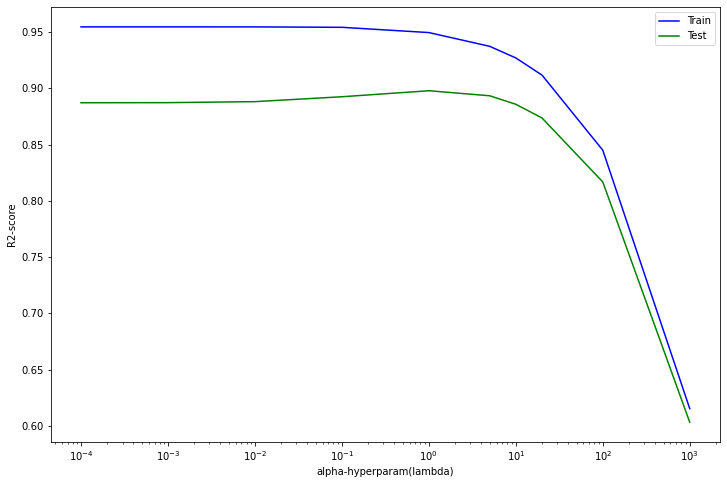

In [535]:
results_cv_ridge = pd.DataFrame(ridge_cv.cv_results_)
plt.figure(figsize=(12,8))
plt.plot(results_cv_ridge.param_alpha,results_cv_ridge.mean_train_score,color='blue',label = 'Train')
plt.plot(results_cv_ridge.param_alpha,results_cv_ridge.mean_test_score,color='green',label = 'Test')
plt.xscale('log')
plt.xlabel('alpha-hyperparam(lambda)')
plt.ylabel('R2-score')
plt.legend()
plt.show()

In [536]:
results_cv_ridge[results_cv_ridge.param_alpha.isin([.1,1,5,10,20,100])][['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
3,0.1,0.954193,0.892466
4,1,0.949521,0.897812
5,5,0.937318,0.893349
6,10,0.926978,0.885772
7,20,0.911731,0.873624
8,100,0.844966,0.816732


In [542]:
# Train the Ridge Regression using alpha = 1
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

In [611]:
ridge_test_r2 = round(r2_score(y_test,y_test_pred),3)
ridge_test_rmse = round(mean_squared_error(y_test,y_test_pred) ** 0.5,3)
ridge_train_r2 = round(r2_score(y_train,y_train_pred),3)
ridge_train_rmse = round(mean_squared_error(y_train,y_train_pred) ** 0.5,3)
model_accuracy.loc[2] = ['Ridge',ridge_train_r2,ridge_train_rmse,ridge_test_r2,ridge_test_rmse,1]
model_accuracy.head()

,Model,Train_r2,Train_RMSE,Test_R2,Test_RMSE,HyperParam
0,LinearReg_RFE,0.425,46113.788,0.371,47562.631,15
1,LinearReg_RFE,0.445,45303.776,0.408,46147.222,17
2,Ridge,0.946,14186.373,0.900,18938.397,1


In [556]:
# Fetching top 10 features with positive and negative coefficients using ridge
feat = sorted(list(zip(X_train.columns,ridge.coef_)),key = lambda x : x[1],reverse=True)
ridge_coef = feat[:10] + feat[-10:]
ridge_coef

[('GrLivArea', 103100.13129000909),
 ('TotalBsmtSF', 66278.71311225685),
 ('1stFlrSF', 39357.28498809262),
 ('YearBuilt', 35149.01178665337),
 ('OverallQual_9', 30575.162455422305),
 ('LotArea', 22541.371240240773),
 ('GarageArea', 22288.731452222917),
 ('OverallQual_10', 21512.701311557194),
 ('Neighborhood_Crawfor', 18528.761324635227),
 ('Functional_Typ', 17621.116930365042),
 ('OverallQual_5', -13528.703721534503),
 ('Exterior1st_BrkComm', -13546.185718290304),
 ('Foundation_Wood', -13710.844911270751),
 ('Neighborhood_MeadowV', -14802.5355514017),
 ('Condition1_RRAe', -14937.63545786872),
 ('OverallCond_3', -18418.8700216219),
 ('OverallQual_3', -20282.854090222452),
 ('MSZoning_C (all)', -23763.761784539936),
 ('Functional_Sev', -25328.32416840729),
 ('BsmtUnfSF', -26841.41209293622)]

<b>Observations:</b>
1. Build the Ridge Regression model using 4-fold cross validation.
2. Used GridSearchCV to find best hyperparam for regularization.
3. Best alpha was derived as 1
4. Built the Ridge model using alpha as 1 and calculated test and train r2_score and RMSE.
5. Test R2-score = 0.90 and train R2-score = 0.946
6. RMSE for Test = 18938.39 and for train = 14186.37
7. Derived the top 10 features with positive coefficients and negative coefficients.
8. Top 5 Features with positive coefficients
    * GrLivArea
    * TotalBsmtSF
    * 1stFlrSF
    * YearBuilt
    * OverallQual_9 (Excellent quality)
9. Top 5 Features with negative coefficients
    * BsmtUnfSF (Unfinished square feet of basement area)
    * Functional_Sev (Severely damaged home functionality)
    * MSZoning_C (Commercial zone)
    * OverallQual_3 (material and finish of the house - Fair)
    * OverallCond_3 (condition of the house - Fair)

### Building the model using Lasso Regression (L1 regularization)

In [561]:
params = {'alpha':[.001,.01,.1,1,10,20,100,200,500,1000]}
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_cv = GridSearchCV(estimator=lasso , param_grid=params , cv=folds, scoring='r2' , return_train_score=True, verbose=1)
lasso_cv.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.2s finished


GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 20, 100, 200, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

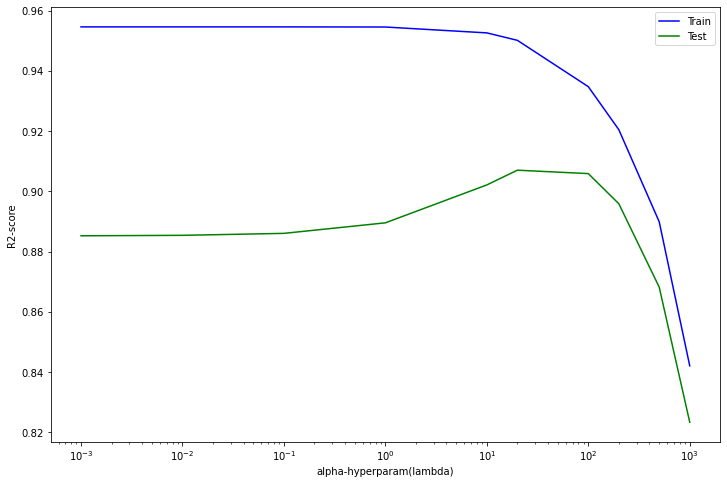

In [562]:
results_cv_lasso = pd.DataFrame(lasso_cv.cv_results_)
plt.figure(figsize=(12,8))
plt.plot(results_cv_lasso.param_alpha,results_cv_lasso.mean_train_score,color='blue',label = 'Train')
plt.plot(results_cv_lasso.param_alpha,results_cv_lasso.mean_test_score,color='green',label = 'Test')
plt.xscale('log')
plt.xlabel('alpha-hyperparam(lambda)')
plt.ylabel('R2-score')
plt.legend()
plt.show()

In [563]:
results_cv_lasso[results_cv_lasso.param_alpha.isin([1,10,20,100,200,500])][['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
3,1,0.954527,0.889516
4,10,0.952581,0.902101
5,20,0.950113,0.906995
6,100,0.934732,0.905862
7,200,0.920444,0.895857
8,500,0.889882,0.868182


In [565]:
# Train the Ridge Regression using alpha = 1
best_alpha = 100
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train,y_train)
y_test_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)

In [612]:
lasso_test_r2 = round(r2_score(y_test,y_test_pred),3)
lasso_test_rmse = round(mean_squared_error(y_test,y_test_pred) ** 0.5,3)
lasso_train_r2 = round(r2_score(y_train,y_train_pred),3)
lasso_train_rmse = round(mean_squared_error(y_train,y_train_pred) ** 0.5,3)
model_accuracy.loc[3] = ['Lasso',lasso_train_r2,lasso_train_rmse,lasso_test_r2,lasso_test_rmse,100]
model_accuracy.head()

,Model,Train_r2,Train_RMSE,Test_R2,Test_RMSE,HyperParam
0,LinearReg_RFE,0.425,46113.788,0.371,47562.631,15
1,LinearReg_RFE,0.445,45303.776,0.408,46147.222,17
2,Ridge,0.946,14186.373,0.900,18938.397,1
3,Lasso,0.931,16000.584,0.908,18196.218,100


In [572]:
# Fetching top 10 features with positive and negative coefficients using ridge
feat = sorted(list(zip(X_train.columns,lasso.coef_)),key = lambda x : x[1],reverse=True)
lasso_coef = feat[:10] + feat[-10:]
lasso_coef

[('GrLivArea', 142349.528272456),
 ('TotalBsmtSF', 64973.465544563005),
 ('OverallQual_9', 39756.86732626436),
 ('YearBuilt', 27165.401194626895),
 ('OverallQual_8', 23149.85394177292),
 ('Neighborhood_Crawfor', 22204.51972039798),
 ('GarageArea', 20818.74528085394),
 ('KitchenQual_Ex', 17472.33188769226),
 ('OverallQual_10', 15919.138088644133),
 ('Neighborhood_NoRidge', 15460.441413182356),
 ('OverallCond_5', -4726.569749694708),
 ('MSZoning_RM', -5286.165957608937),
 ('GarageCars_0', -6502.96021154542),
 ('ExterQual_TA', -7165.573698803962),
 ('SaleCondition_Abnorml', -8771.005975492826),
 ('OverallCond_4', -8867.357550653172),
 ('OverallQual_3', -9358.95712064496),
 ('MSZoning_C (all)', -15135.056484124547),
 ('OverallCond_3', -17843.27214442922),
 ('BsmtUnfSF', -21231.750962844482)]

In [594]:
zero_coef_features = [el[0] for el in feat if el[1] == 0]
print(f'No of features discarded by Lasso : {len(zero_coef_features)} out of 310 total features')

No of features discarded by Lasso : 201 out of 310 total features


<b>Observations:</b>
1. Build the Lasso Regression model using 4-fold cross validation.
2. Used GridSearchCV to find best hyperparam for regularization.
3. Best alpha was derived as 100 by considering tradeoff between train and test accuracy
4. Built the Lasso model using alpha as 100 and calculated test and train r2_score and RMSE.
5. Test R2-score = 0.90 and train R2-score = 0.931
6. RMSE for Test = 18196.21 and for train = 16000.58
7. Derived the top 10 features with positive coefficients and negative coefficients.
8. Top 5 Features with positive coefficients
    * GrLivArea
    * TotalBsmtSF
    * OverallQual_9 (Excellent quality)
    * YearBuilt
    * OverallQual8 (Very good quality)
9. Top 5 Features with negative coefficients
    * BsmtUnfSF (Unfinished square feet of basement area)
    * OverallCond_3 (condition of the house - Fair)
    * MSZoning_C (Commercial zone)
    * OverallQual_3 (material and finish of the house - Fair)
    * OverallCond_4 (Below Average)
10. Lasso has made beta coefficient to 0 for 201 features out of 310 features 

In [622]:
# Metrics and performance comparision of each model
model_accuracy['Train_test_diff'] = model_accuracy['Train_r2'] - model_accuracy['Test_R2']
model_accuracy

,Model,Train_r2,Train_RMSE,Test_R2,Test_RMSE,HyperParam,Train_test_diff
0,LinearReg_RFE,0.425,46113.788,0.371,47562.631,15,0.054
1,LinearReg_RFE_CV,0.445,45303.776,0.408,46147.222,17,0.037
2,Ridge,0.946,14186.373,0.900,18938.397,1,0.046
3,Lasso,0.931,16000.584,0.908,18196.218,100,0.023
